In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score ,KFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures , scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('Ecommerce_Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.isnull().sum()


Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
df.corr()


C:\Users\railm\AppData\Local\Temp\ipykernel_13468\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


C:\Users\railm\AppData\Local\Temp\ipykernel_13468\909201889.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


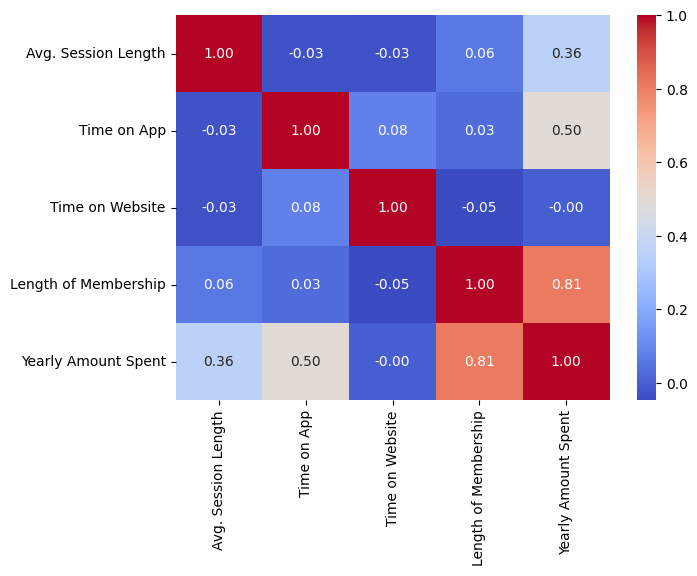

In [21]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [8]:
df1 = df.loc[:,['Length of Membership','Yearly Amount Spent']]
df1.head()

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092


In [9]:
df1_columns = df1.columns

scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)

df1 = pd.DataFrame(df1)
df1.columns = df1_columns
df1

,Length of Membership,Yearly Amount Spent
0,0.573101,0.651040
1,0.359869,0.266355
2,0.576396,0.453725
3,0.428434,0.639055
4,0.627768,0.673552
...,...,...
495,0.522589,0.623324
496,0.497028,0.535285
497,0.704722,0.579642
498,0.310634,0.392650


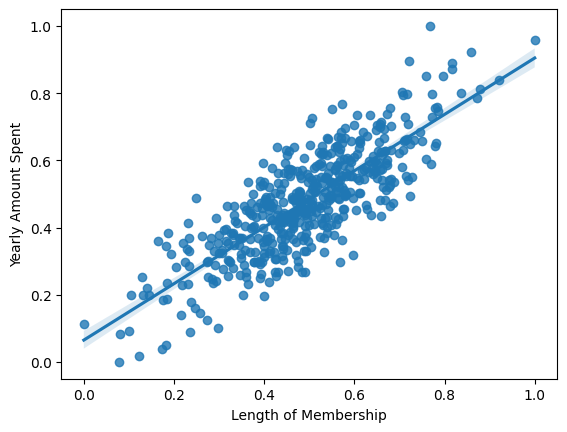

In [10]:
sns.regplot(x ='Length of Membership', y = 'Yearly Amount Spent', data= df1, fit_reg =True);

In [11]:
df1_train, df1_test = train_test_split(df1,
                                     test_size=0.3,
                                     random_state=10)

print(len(df1_test))
print(len(df1_train))

150
350


In [12]:

X_train = df1_train['Length of Membership']
X_train = X_train.values.reshape(-1,1)
y_train = df1_train['Yearly Amount Spent']

X_test = df1_test['Length of Membership']
X_test = X_test.values.reshape(-1,1)
y_test = df1_test['Yearly Amount Spent']

X_train

array([[0.62030395],
       [0.377896  ],
       [0.55972854],
       [0.39191444],
       [0.32055022],
       [0.47009793],
       [0.551342  ],
       [0.44508748],
       [0.38600989],
       [0.07990855],
       [0.63796129],
       [0.59733026],
       [0.49472703],
       [0.56510933],
       [0.37872247],
       [0.3452295 ],
       [0.87862377],
       [0.27431966],
       [0.40982267],
       [0.50144882],
       [0.47985862],
       [0.45829223],
       [0.40156241],
       [0.6470049 ],
       [0.46475454],
       [0.65845928],
       [0.3993873 ],
       [0.71700075],
       [0.07810542],
       [0.68188681],
       [0.23573719],
       [0.42849219],
       [0.21607311],
       [0.53721052],
       [0.66832187],
       [0.28741571],
       [0.66052868],
       [0.49343953],
       [0.45684323],
       [0.33210718],
       [0.23312173],
       [0.48130467],
       [0.1821365 ],
       [0.35439635],
       [0.45775148],
       [0.46545336],
       [0.39930556],
       [0.521

In [13]:
degrees = [ 1,2,3,6,10,20]

y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for idx , degree in enumerate(degrees):
    
    model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(X_train, y_train)
    
    
    y_train_pred[:,idx] = model.predict(X_train)
    y_test_pred[:,idx] = model.predict(X_test)

In [14]:
print("R-squered values: \n")

for idx, degree in enumerate(degrees):
    train_r2 = round(r2_score(y_train, y_train_pred[:,idx]),2)
    test_r2 = round(r2_score(y_test,y_test_pred[:,idx]),2)
    print("polynwomial degree{0}:train score = {1}, testscore={2}".format(degree,train_r2,test_r2))

R-squered values: 

polynwomial degree1:train score = 0.63, testscore=0.68
polynwomial degree2:train score = 0.63, testscore=0.68
polynwomial degree3:train score = 0.63, testscore=0.69
polynwomial degree6:train score = 0.63, testscore=0.66
polynwomial degree10:train score = 0.63, testscore=-9.89
polynwomial degree20:train score = 0.64, testscore=-88009201.04
